# Sixt Data Science Lab - Test Task for Data Scientist Job Candidates

## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and vizalizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data from UCI Repository and put it into the same folder with the notebook. The link to it is https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset . Here is an available mirror in case the above website is down: https://data.world/uci/bike-sharing-dataset
3. We split the data into two parts. One dataset containing the last 30 days and one dataset with the rest.

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
# read raw data
df_all = pd.read_csv('day.csv')

# split dataset
df_last30 = df_all.tail(30)
df = df_all.iloc[:-30, :]

df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
696,697,2012-11-27,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959
697,698,2012-11-28,4,1,11,0,3,1,1,0.296667,0.289762,0.506250,0.210821,198,5062,5260
698,699,2012-11-29,4,1,11,0,4,1,1,0.280870,0.298422,0.555652,0.115522,243,5080,5323
699,700,2012-11-30,4,1,11,0,5,1,1,0.298333,0.323867,0.649583,0.058471,362,5306,5668
700,701,2012-12-01,4,1,12,0,6,0,2,0.298333,0.316904,0.806667,0.059704,951,4240,5191


## Part 2 - Data Processing and Analysis

**Tasks:**
1. Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. Visualise rentals of bikes per day.
3. Assume that each bike has exactly maximum 12 rentals per day.
    * Find the maximum number of bicycles `nmax` that was needed in any one day.
    * Find the 95%-percentile of bicycles `n95` that was needed in any one day.
5. Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)


In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [4]:
# No null values and Datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [5]:
# No missing values, therefore no imputation needed
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,351.000000,2.479315,0.479315,6.285307,0.028531,3.004280,0.684736,1.385164,0.502732,0.480847,0.625717,0.190534,866.937233,3661.104137,4528.041369
std,202.505555,1.090839,0.499929,3.329294,0.166602,2.003207,0.464953,0.542489,0.182781,0.162584,0.141988,0.076740,693.470674,1553.467783,1939.766889
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,176.000000,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.343478,0.348470,0.519167,0.134958,317.000000,2507.000000,3194.000000
50%,351.000000,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.514167,0.503146,0.623750,0.182221,738.000000,3656.000000,4541.000000
75%,526.000000,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.613025,0.728750,0.233221,1135.000000,4739.000000,6041.000000
max,701.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Part 2 - 2.Visualize daily bike rentals

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

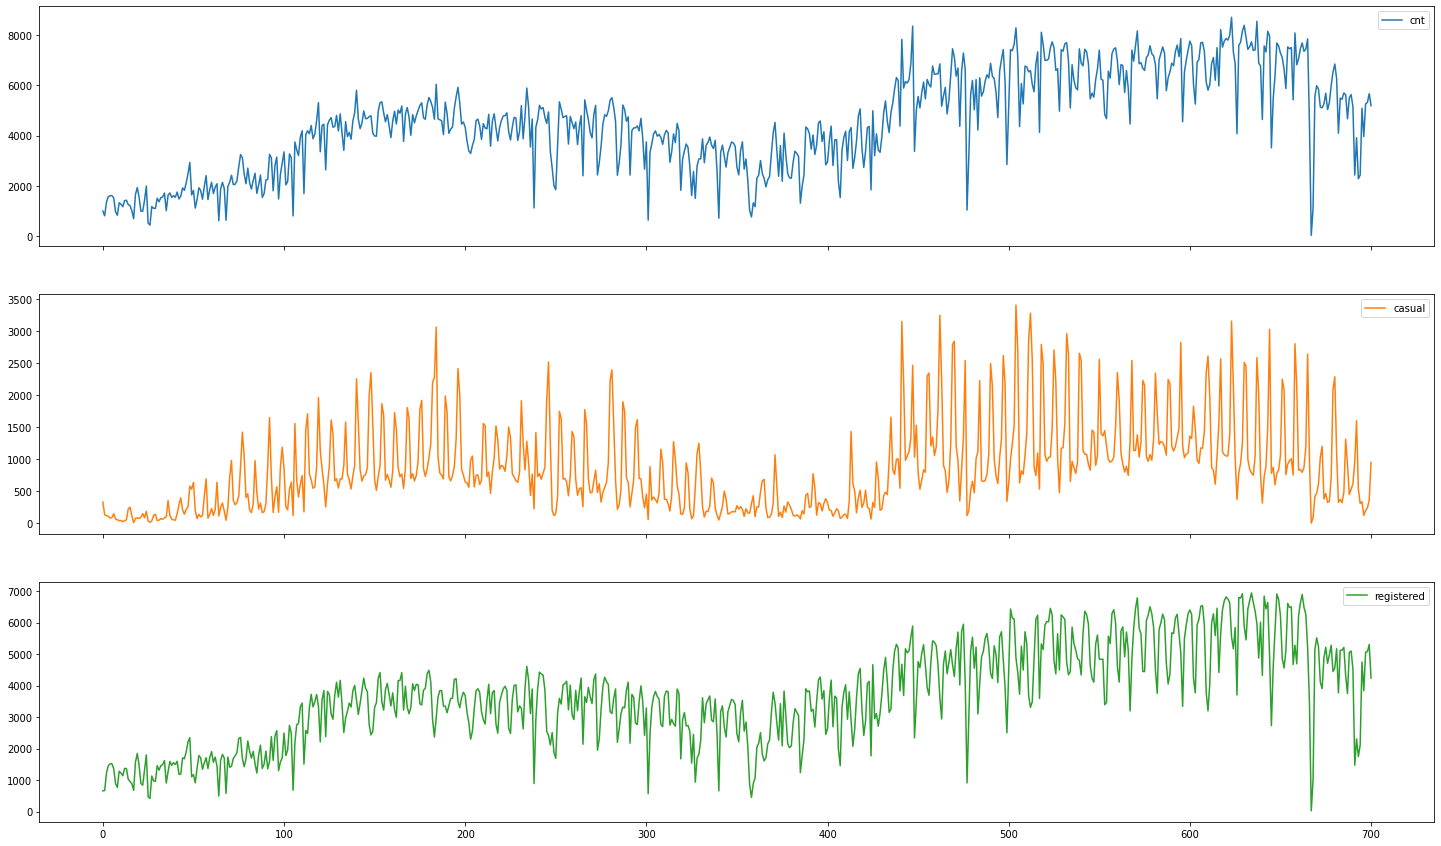

In [7]:
df_gap_check = df.copy()
df_gap_check['dteday'] =  pd.to_datetime(df_gap_check['dteday'], format='%Y-%m-%d')
df_gap_check[["cnt", "casual", "registered"]].plot(subplots=True, figsize=(25, 15))

### Part 2 - 3.Number of Bikes determination

In [8]:
df_cover_days = df.copy()
df_cover_days['n_bikes'] = df_cover_days['cnt'].div(12).round(0)
print(f'Maximum number of bicycles that was needed in any one day = {df_cover_days["n_bikes"].max()}')
print(f'95%-percentile of bicycles that was needed in any one day = \
{np.percentile(df_cover_days["n_bikes"], 95)}')

Maximum number of bicycles that was needed in any one day = 726.0
95%-percentile of bicycles that was needed in any one day = 632.0


### Part 2 - 4.Distribution of covered days 
Kth percentile would cover K% of days - So find the percentile score for each day.
Usage: 
1. Estimation of number of bikes needed to cover 50 days or Estimate the number of days covered by 500 bikes.
2. Extrapolate the plot to predict the number of bikes needed for days outside of the dataset (say 150)

In [9]:
def find_percentile(input_point):
    """
    Find the percentile rank for a given point in the dataset
    Args:
        input_point (float) - Data sample to compute the percentile rank
    Returns:
        n_rank (int) - Percentile rank of the sample point in the dataset
    """
    n_rank = stats.percentileofscore(df_cover_days["n_bikes"], int(input_point), kind='rank')
    return math.ceil(n_rank)

df_cover_days['covered_days'] = df_cover_days['n_bikes'].apply(lambda x: find_percentile(x))

<AxesSubplot:xlabel='n_bikes', ylabel='covered_days'>

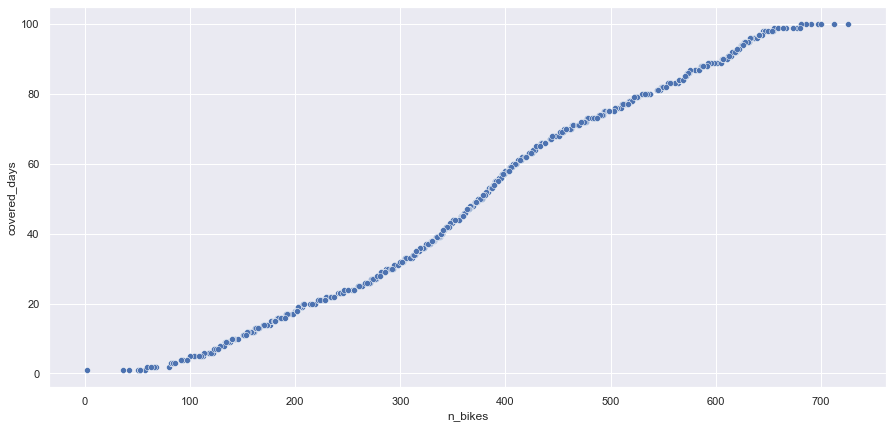

In [10]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x='n_bikes', y='covered_days', data=df_cover_days)

**Answers / comments / reasoning:**


## Part 3 - Building prediction models

**Tasks:**
1. Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models, and explain your choice.
2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn. 
3. Report the value of the chosen test metric on the provided data. 

### Exploratory data analysis

In [11]:
import seaborn as sns
from collections import Counter
from sklearn.cluster import DBSCAN
from scipy.special import boxcox1p
from matplotlib.gridspec import GridSpec


In [12]:
# The cnt column is normalized to accomodate the range of values of different columns in a box plot for the
# purpose of visualization

df_eda = df.copy()
df_eda.loc[:,'cnt'] /= df_eda.cnt.max()

#### Distribution of Environmental variables - Humidity, Windspeed, Temperature
Plotting relationship and distribution between target variable and environmental variables in our feature set.
  

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

Skew and correlation are inversely proportional - If skew is +ve corr is -ve and vice versa.

The benefit of symmetric distributions is that we require smaller sample sizes to apply the central limit theorem when calculating confidence intervals or performing hypothesis tests.


In [13]:
def make_continuous_plot(input_df, feature, target_col):
    """
    Plotting scatter plot and its boxcox (1+x) transformation for a given continuous variable 
    feature against the target variable.
    Args:
        input_df (pd.Dataframe) - Input dataframe for plotting the graphs
        feature (str) - xaxis column name
        target_col (str) - yaxis target column name
    """
    
    fig = plt.figure(figsize=(20,6))
    fig.subplots_adjust(hspace=.3)
    gs = GridSpec(1,2)
    
    j = sns.distplot(input_df[feature], ax=fig.add_subplot(gs[0,1]), color = 'green')

    plt.title('Distribution\n')
    
    j = sns.scatterplot(y=input_df[target_col], 
                        x=input_df[feature], ax=fig.add_subplot(gs[0,0]), color = 'red')

    plt.title('Linear\n' + 'Corr: ' + str(np.round(input_df[target_col].corr(input_df[feature]),2)) + ', Skew: ' + 
               str(np.round(stats.skew(input_df[feature], nan_policy='omit'),2)))


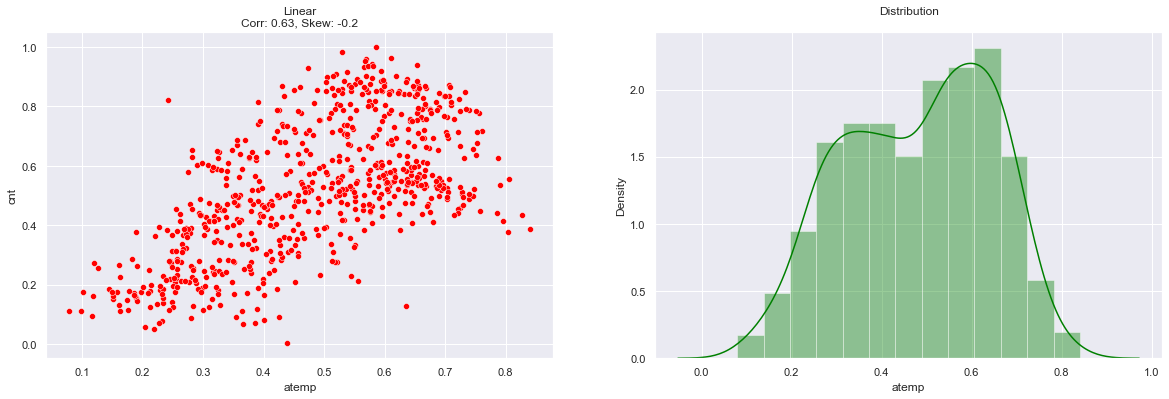

In [14]:
make_continuous_plot(df_eda, 'atemp', 'cnt')

# atemp - Symmentric and Bimodal distribution
# High +ve Correlation (Pearson's) b/w atemp and cnt

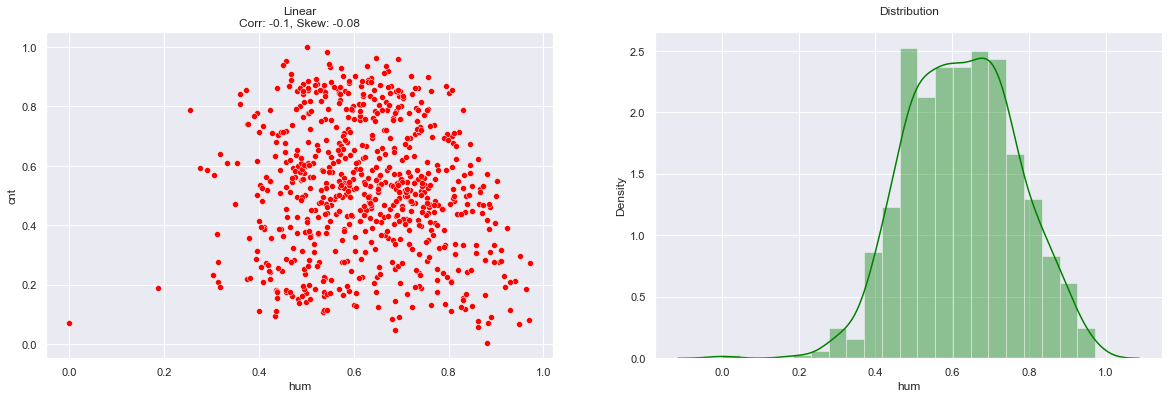

In [15]:
make_continuous_plot(df_eda, 'hum', 'cnt')

# hum - Symmentric and Near normal distribution
# Moderately -ve correlation b/w hum and cnt

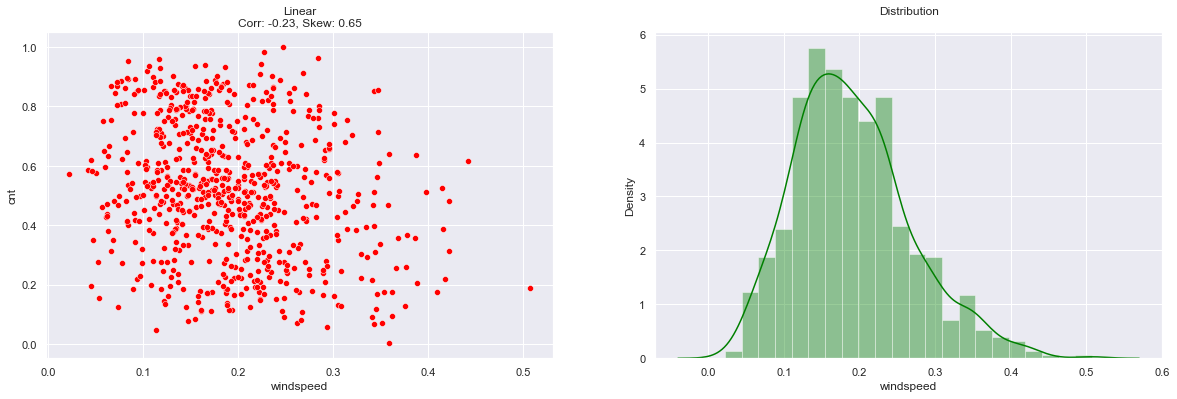

In [16]:
make_continuous_plot(df_eda, 'windspeed', 'cnt')

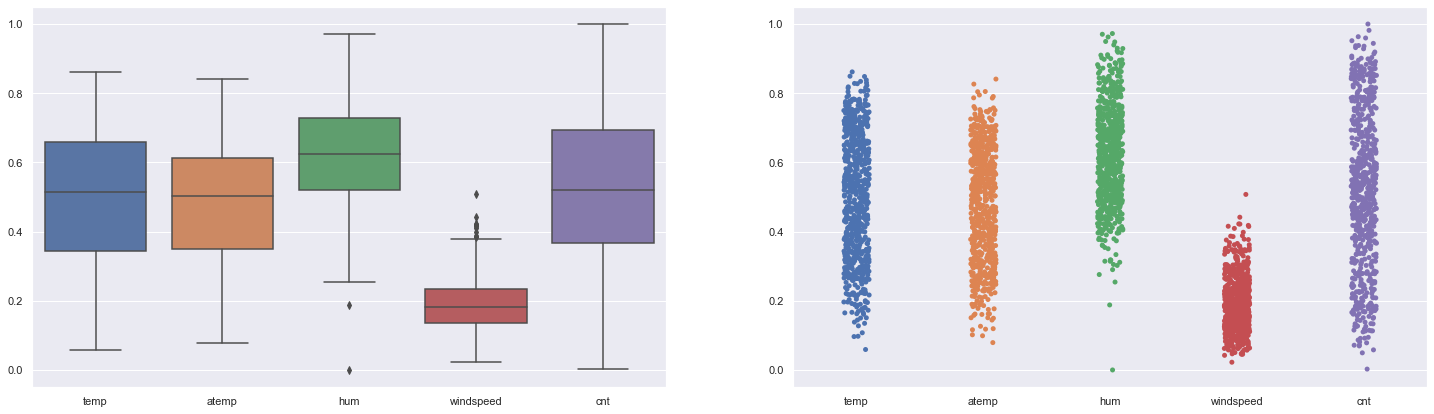

In [17]:
fig = plt.figure(figsize=(25,7))
gs = GridSpec(1,2)
sns.boxplot(data=df_eda[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(data=df_eda[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], ax=fig.add_subplot(gs[0,1]))
fig.show()

#### Correlation between features and target

<AxesSubplot:>

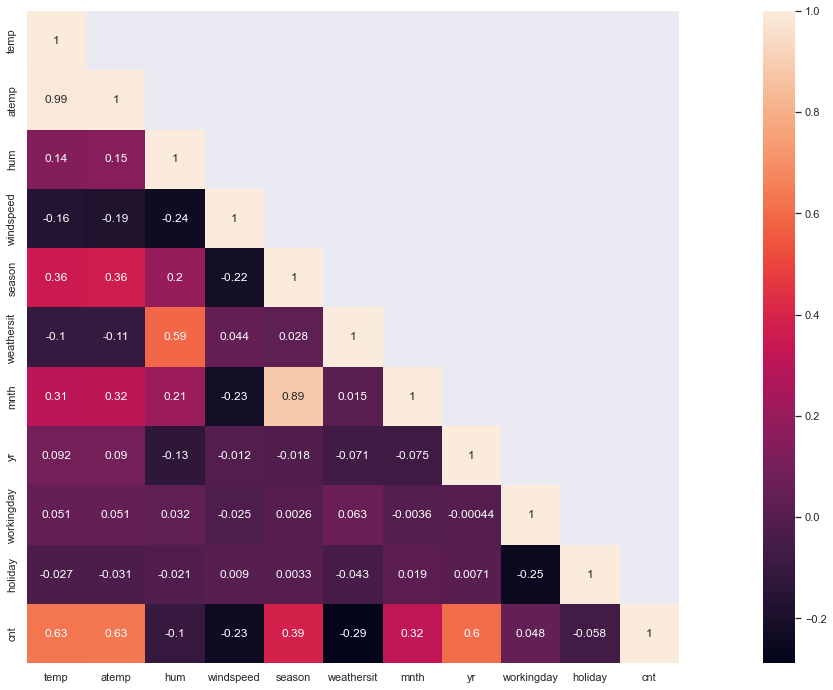

In [18]:
cor_mat= df_eda[['temp', 'atemp', 'hum', 'windspeed', 'season', 
                 'weathersit', 'mnth', 'yr', 'workingday', 'holiday', 'cnt']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

#### Outlier check

DBSCAN parameters

* https://stackoverflow.com/questions/47533930/how-can-i-choose-eps-and-minpts-two-parameters-for-dbscan-algorithm-for-effici
* https://www.youtube.com/watch?v=C3r7tGRe2eI&t=709s&ab_channel=KrishNaik

In [19]:
df_outlier_rmv = df[['atemp', 'hum', 'windspeed', 'season']].copy()
clusters = DBSCAN(eps=0.15, min_samples=25, algorithm='ball_tree', 
                  metric='minkowski', p=2).fit(df_outlier_rmv)
Counter(clusters.labels_)

Counter({0: 165, -1: 22, 1: 174, 2: 187, 3: 153})

Impact of Outlier on Decision Trees:
* Due to outliers, the depth of the decision tree increases and the model will get over fitted.

* Ensemble models don't have a problem with Outliers due to sampling and aggregation.

* we can neglect outliers using min_samples_split and min_samples_leaf

#### Outcome - EDA and Outlier Check
##### Co-Relation of environmental variable with the target variable
* ``atemp`` shows a high positive correlation of 0.63 with the count of bike rentals. The distribution is entirely spread along the x-axis with majority of bike rentals occuring in the interval of 0.3 to 0.7 of the normalized `atemp`.

* Except 1 or 2 outliers `humidity` is negatively correlated (-0.1) which means customers do not prefer to rent a bike on a humid day. Notable the negativity is not high as it should be, which indicates not all information is available to make a conclusion. 

* `windspeed` intutively shows negative correlation with the count of rented bikes. Customers might not prefer to ride a bike on a windy day. Unlike `humidity` which has a short ending tail (low kurtosis value) `windspeed` has a longer tail end (high kurtosis) indicating that windspeed is not as impactful as humidity on the extreme conditions.

* From the correlation matrix we observe that `holiday` is negatively correlated with the count - Therefore bike rentals take a dip during public holidays and weekends.

* ``Weathersit`` and ``cnt`` are highly inversely correlated. Because of the method used in our data for labeling the weather i.e 1 is better and 4 is worst. More people will rent bikes on a plesant whether than on an unpleasant one. 
  
* Severe multicollinearity exists between calendar features and environmental variables (For example - Season with atemp, hum, windspeed). However our goal being to forecast the bikes rental count and not any sort of hypothesis testing or identifying significant control variable, it is not required to reduce the multicollinearity.

* From the outlier detection using DBSCAN we can be confident that the dataset is not influenced by any outliers except very few points which can be ignored.


### Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder

#### Tranform continuous to categorical variables
**Reference** - Feature engineering - Bike Share Demand Prediction using RandomForests 

Access link  - https://ijiset.com/vol2/v2s4/IJISET_V2_I4_195.pdf

* *Divide temprature, humidity and windspeed variables into categories. Doing so we can better accuracy in the model*

* The environmental variables `['hum', 'windspeed', 'atemp']` are converted into categorical variables by binning the values in 5 intervals. 

* To avoid the leakage of distribution the bin intervals computed for the train data are used for test data. 
* Binned intervals are label encoded using scikit-learn label encoder. The fitted label encoders are used for transforming the test data as well.

* Label encoded columns are converted into categorical columns using pandas dummies method.

* Target variable i.e `cnt` is log transformed for training and reverse transformed for validation to reflect the actual performance on the test data

In [21]:
def calculate_bins(input_df, input_bins, input_col):
    """
    Function to compute bins and corresponding intervals for a specific feature
    Args:
        input_df (pd.DataFrame) - Input dataframe
        input_bins (int) - Number of bins into which the samples have to be grouped
        input_col (str) - Feature name or column name to be binned
    """
    binned_arr, bins = pd.cut(input_df[input_col], input_bins, retbins=True)
    #bins = np.concatenate(([-np.inf], bins[1:-1], [np.inf]))
    return binned_arr, bins

In [22]:
def fit_encoder(input_arr):
    """
    Function to encode the bins computed as labels
    """
    label_encoder = LabelEncoder()
    label_encoder.fit(input_arr)
    return label_encoder

In [23]:
def generate_dummy_cols(input_df, input_col):
    """
    Function to transform the label encoded column into categorical column
    Args:
        input_df (pd.DataFrame) - Input dataframe
        input_col (str) - Column name which has to be transformed into categorical data
    """
    dummy_cols = pd.get_dummies(input_df[input_col],prefix=input_col)
    input_df=pd.concat([input_df,dummy_cols],axis=1)
    return input_df

In [24]:
drop_cols = ['instant', 'casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed',
            'season', 'weathersit']

##### Train data transform

In [25]:
df_transform = df.copy()
df_transform = df_transform.set_index('dteday')

In [26]:
def enocode_continous_train_data(org_col):
    """
    Function that utilizes bin function and label encoder function 
    to transform the train data
    """
    df_transform[org_col], output_bins = calculate_bins(df_transform, 5, org_col)
    col_encoder = fit_encoder(df_transform[org_col])
    df_transform[org_col] = col_encoder.transform(df_transform[org_col])
    return output_bins, col_encoder

In [27]:
windspeed_bins, windspeed_encoder = enocode_continous_train_data('windspeed')

atemp_bins, atemp_encoder = enocode_continous_train_data('atemp')

hum_bins, hum_encoder = enocode_continous_train_data('hum')

In [28]:
cat_cols = ['season', 'weathersit', 'windspeed', 'atemp', 'hum']

for cat_col in cat_cols:
    df_transform = generate_dummy_cols(df_transform, cat_col)

In [29]:
# We also transform the count into log(count + 1)
# this is important the distribution of counts is skewed
# When tested - Transformed taget yielded lower RMSE

df_transform["cnt"] = df_transform["cnt"].map(np.log1p)

In [30]:
df_transform = df_transform.drop(columns=drop_cols)

##### Test data transform

* As mentioned to avoid revealing the distribution of the test data, we use the bin intervals computed for train data to convert the continuous variables of the test data.
* Additional engineering - Replace -inf and inf with the respective bins lower and upper bound values from the label encoder classes. 
  * *This step can be eliminated by removing np.concatenate to include -inf and inf in `compute_bins` function*. Because the range of input array is inherently extended by 0.1% on both ends by the library itself. 

* Use the fitted label encoder to encode the binned variable ranges into labels.

* Fill missing features with null values:
  * The test data had certain features missing w.r.t train data - Because the test data contains only the Month of December from the year 2012 where the absolute values of the environmental variables might be very different from those in the train data during the rest of the year and in the previous year 2011

In [31]:
df_test_transform = df_last30.copy()

df_test_transform = df_test_transform.set_index('dteday')

In [32]:

def encode_continuous_test_data(encoder_func, compute_bins, org_col):
    """
    Convert continuous data into categorical data using the bins computed from
    train data.
    Args:
        encoder_func (LabelEncoder) - Fitted label ecoder using the train data
        compute_bin (np.array) - Array of computed bins from the train data 
        org_col (str) - Column to be transformed in the test data
    """
    try:
        # Checked manually - Encoder classes are ordered in ascending order by default.
        # So we can confidently replace -np.inf and np.inf with first class left value and 
        # last class right value respectively.
        
        #compute_bins[compute_bins == -np.inf] = encoder_func.classes_[0].left
        #compute_bins[compute_bins == np.inf] = encoder_func.classes_[-1].right
        
        df_test_transform[org_col], _ = calculate_bins(df_test_transform, 
                                                       compute_bins, 
                                                       org_col)
        df_test_transform[org_col] = encoder_func.transform(df_test_transform[org_col])
        return 1
    except:
        return 0

In [33]:
list(map(encode_continuous_test_data, *zip((windspeed_encoder, windspeed_bins, 'windspeed'), 
                                           (atemp_encoder, atemp_bins, 'atemp'), 
                                           (hum_encoder, hum_bins, 'hum')
                                          )))

[1, 1, 1]

In [34]:
for cat_col in cat_cols:
    df_test_transform = generate_dummy_cols(df_test_transform, cat_col)

In [35]:
df_test_transform["cnt"] = df_test_transform["cnt"].map(np.log1p)

In [36]:
missing_feature_cols = list(set(df_transform) - set(df_test_transform.columns))
df_test_transform = pd.concat(
    [
        df_test_transform,
        pd.DataFrame(
            [[0] * len(missing_feature_cols)], 
            index=df_test_transform.index, 
            columns=missing_feature_cols
        )
    ], axis=1
)

In [37]:
df_test_transform = df_test_transform.drop(columns=drop_cols)

In [38]:
assert set(df_test_transform.columns) == set(df_transform.columns)

### Model Training, Evaluation and Testing

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

In [40]:
feature_cols = [cols for cols in df_test_transform.columns if cols != 'cnt']
target_cols = ['cnt']

#### Train and Validation split 

In [41]:
x_train = df_transform[feature_cols][0:670]
y_train = df_transform[target_cols][0:670]
x_test = df_transform[feature_cols][670:]
y_test = df_transform[target_cols][670:]

#### Hyper parameter determination using Bayesian Optimization Algorithm
* https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
* Search Space Parameters - n_estimators, max_features, max_samples, max_depth
* Objective - Random forest regressor and rmse as the loss function
* Algorithm - Sequential search of hyperparameters (tpe.suggest) Tree parzen estimator

In [43]:
space= {'n_estimators':1 + hp.randint('n_estimators', 500),
        'max_features':1 + hp.randint('max_features', 25),
        'max_samples':1 + hp.randint('max_samples', 100),
        'max_depth':1 + hp.randint('max_depth', 15),
        'min_samples_leaf':2 + hp.randint('min_samples_leaf', 150),
        'max_leaf_nodes':2 + hp.randint('max_leaf_nodes', 50),
        'criterion':hp.choice('criterion', ["squared_error", "absolute_error", "poisson"])
       }

def objective(space):
    """
    Function to minimize that receives hyperparameters values as input from 
    the search space and returns the loss.
    Args: 
        space (dict) - Hyperparameter space
    Returns:
        RMSE loss of the validation dataset for a specific choice of hyperparam
    """
    rf = RandomForestRegressor(**space)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

trials = Trials()
best = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials)

print('Best hyper params for the Random Forest Regressor are \n', best)

100%|██████████| 50/50 [00:10<00:00,  4.88trial/s, best loss: 0.27384046674516044]
Best hyper params for the Random Forest Regressor are 
 {'criterion': 1, 'max_depth': 12, 'max_features': 14, 'max_leaf_nodes': 15, 'max_samples': 57, 'min_samples_leaf': 11, 'n_estimators': 195}


#### Loss variation for different set of hyper params

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

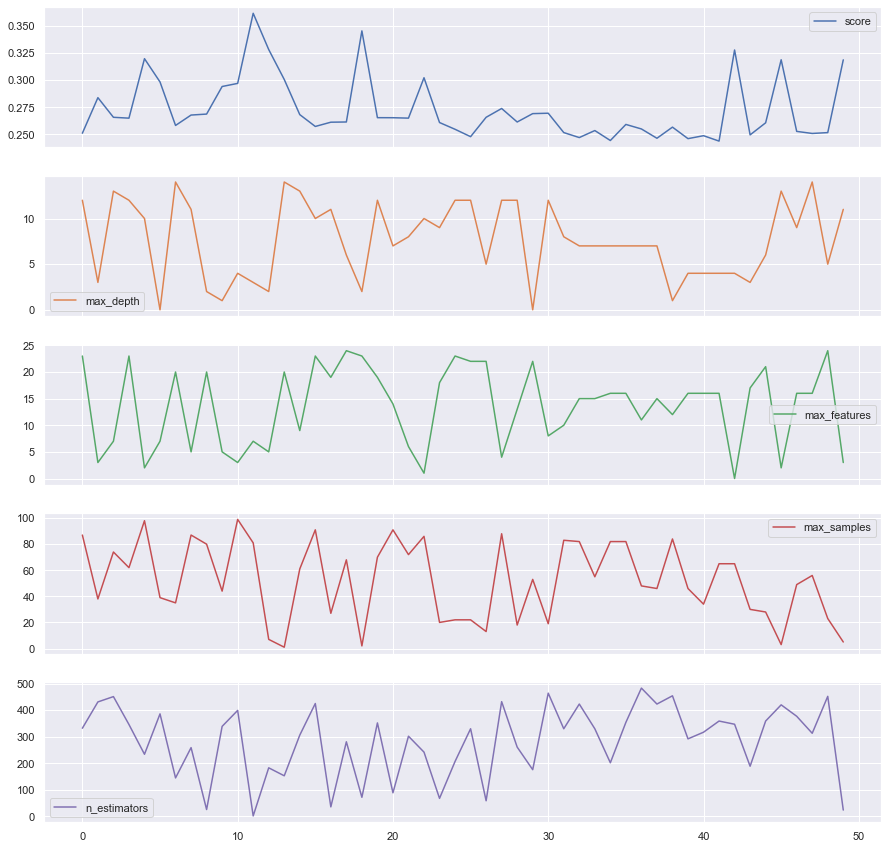

In [49]:
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['max_features'][0],
                      x['misc']['vals']['max_samples'][0],
                      x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 'max_depth', 'max_features', 'max_samples', 'n_estimators'])
tpe_results_df.plot(subplots=True,figsize=(15, 15))

#### Baseline model - Linear regression

In [56]:
# Chosen as the baseline because of the percentile plot b/w bikes vs covered days
baseline_model = LinearRegression()
baseline_model.fit(x_train, y_train)

LinearRegression()

#### Model Fit - Best params

In [42]:
# Hyper parameters chosen from multiple trials of Bayesian Optimization 
rf_regressor = RandomForestRegressor(criterion='squared_error', max_depth=5, max_features=14, 
                                     max_leaf_nodes = 15, max_samples=57, 
                                     min_samples_leaf = 11, n_estimators=350)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features=14, max_leaf_nodes=15,
                      max_samples=57, min_samples_leaf=11, n_estimators=350)

#### Model validation

Choice of model evaluation metric for prediction
 
* Root Mean Squared Error (RMSE) 
  * Residuals are a measure of how far from the regression line data points are. As RMSE calculates the euclidean distance it provides a better understanding of how spread the residuals are or how concentrated the data is around the best fit line. 
  
  * They are negatively-oriented scores, which means lower values are better.
  
  * It is easily interpretable as it uses the same idea of standard deviation except applying square root on residuals instead of variance.


* Root Mean Squared Log Error (RMSLE) 
  * By squaring errors and calculating a mean, RMSE can be heavily affected by a few predictions which are much worse than the rest. 
  
        In RMSE its (y-Y)**2 in RMSLE its (log(y+1) - log(Y+1))**2
  
  * But in case of RMSLE we can reduce the effect of poor predictions by many magnitudes & their effect is much less. RMSLE value will only consider the relative error (% error) between Predicted and the actual value neglecting the scale of data.
  
  * Additionally we encountered some samples in the test data which were out of range compared to train data due to which we encoded them as 0's. In such cases the random forest regressor will predict the target variable by computing the average of other samples. Because of this the RMSE will be high which, RMSLE can be used as an alternative or a parallel metric for model evaluation.

  * For inventory prediction to fulfill all customers - Small inventory with few customers so ensuring every customer is more important than missing out few customers when the inventory is big. Dont want to penalize huge differences in predictions when the absolute numbers are large.

In [43]:
# Reverse transform the target variable for the model validation

df_test_transform['cnt'] = df_test_transform['cnt'].map(np.expm1)

In [44]:
def compute_rmsle(y_true, y_pred):
    """
    Compute root mean squared log error for the predictions
    Args:
        y_true - Actual target values
        y_pred - Prediction target values from the model
    """
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [45]:
def get_perf_metrics(model, df, feature_cols, target_col):

    """
    Generate predictions and compute perfromance metrics 
    Args:
        model (scikit-learn model) - Choice of the model to be evaluated
        feature_cols (list) - List of features to be used for prediction
        target_col (str) - Column name to be predicted
    """
    target_reverse_transform = df[target_col].to_numpy()
    y_pred = model.predict(df[feature_cols].to_numpy())
    y_pred = np.expm1(y_pred)
    
    rmse = float(format(np.sqrt(mean_squared_error(target_reverse_transform, y_pred)), '.3f'))
    print(f"{type(model).__name__} Model performance score on test data in RMSE: {rmse}")

    rmsle = format(compute_rmsle(target_reverse_transform, y_pred), '.3f')
    print(f"{type(model).__name__} Model performance score on test data in RMSLE: {rmsle}")

    mae = format(mean_absolute_error(target_reverse_transform, y_pred), '.3f')
    print(f"{type(model).__name__} Model performance score on test data in MAE: {mae}")
    return y_pred.flatten()

In [46]:
rf_predictions = get_perf_metrics(rf_regressor, df_test_transform, feature_cols, target_cols)
df_test_transform['rf_predictions'] = rf_predictions

RandomForestRegressor Model performance score on test data in RMSE: 1364.369
RandomForestRegressor Model performance score on test data in RMSLE: 0.740
RandomForestRegressor Model performance score on test data in MAE: 1032.863


In [57]:
lr_predictions = get_perf_metrics(baseline_model, df_test_transform, feature_cols, target_cols)
df_test_transform['lr_predictions'] = lr_predictions

LinearRegression Model performance score on test data in RMSE: 906.512
LinearRegression Model performance score on test data in RMSLE: 0.371
LinearRegression Model performance score on test data in MAE: 725.305


#### Plot - Actual Bike rentals for the test data VS Predicted Bike rental 

In [53]:
df_predictions = df_test_transform[['cnt', 'rf_predictions', 'lr_predictions']].copy()
pd.options.plotting.backend = "plotly"
df_predictions.plot(x = df_test_transform.index.values, y = ['cnt', 'rf_predictions', 'lr_predictions'])

### Model Performance Report
* The baseline model i.e Linear regression performs surprisingly better than Random forest regression in terms of our evaluation metric of RMSE and RMSLE. 
  
  * Random forest regressor: RMSE = 1227, MAE = 1057 and RMSLE = 0.7
  * Linear regression: RMSE = 900, MAE = 725 and RMSLE = 0.3

  * Reasons:
    * As random forest is a bagging based algorithm where the dataset is randomly sampled with replacement (bootstraping) the provided data is not sufficient in terms of records for the model to learn the relation between the features and the target.
  
    * We noticed that some features were missing in the test set due to their values falling outside of the range of the train data. This has impacted the performance of the random forest regressor, showing that it is unable to discover trends that would enable it in extrapolating values that fall outside the training set.
  
    * On the other hand as the features and target are linearly correlated (either +ve or -ve) the linear regression model fits the training data well and therefore extrapolated on the test data better than random forest.
  
    * Extrapolation problem b/w linear and random forest resgression - https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why
      * The Random Forest Regressor is unable to discover trends that would enable it in extrapolating values that fall outside the training set. When faced with such a scenario, the regressor assumes that the prediction will fall close to the maximum value in the training set.
    
* Improvements 
  * Being a time series data involving learning of trend and seasonality patterns it would be wise decision to use specialized algorithms from the deep learning domain like LSTM or Attention based models like Temporal fusion transformer.

  * Bike rentals not only depend on the environmental factors and date information but also on factors like
    * Information about the type of locations - industrial, residential, remote, IT parks etc 
    * Distance to travel
    * Traffic information
    * Difference in distance between a Four wheeler route and bike route
    * Landscape information related to elevation and flat surfaces in a particular radius 
    * Gasoline price trends
    * Information about public transport accessibility

### EXTRA - Model explainability, Feature importance and Feature contribution

### Inference from Shapley Values
* Data samples from 2011 impact the model performance negatively where as samples from 2012 contribute positively to the overall model performance.
* The impact on model performance is positively contributed by samples:
  * Where the month value is higher (i.e August, September and so on) 
  * Where the categorical value of hum_4, season_1, atemp_1, atemp_0, weathersit_2, windspeed_2 = 0
  * Where the categorical value of atemp_3, season_3, hum_2, workingday, season_4, weathersit_1 = 1
  * Similarly it can be understood for other catgorical variables from the summary plot below.

In [52]:
import shap

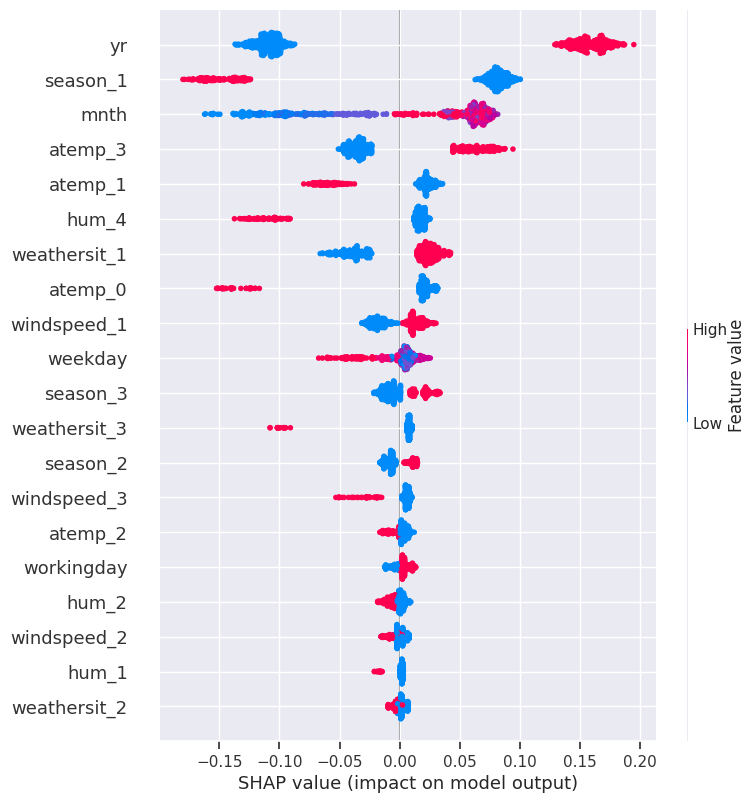

In [53]:
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(df_transform[feature_cols])
shap.summary_plot(shap_values, df_transform[feature_cols], 
                  feature_names = df_transform[feature_cols].columns)

#### Decision plot
The grey vertical line is the base value and the blue line indicates if each feature moved the output value to a higher or lower value than the average prediction for all the test data.

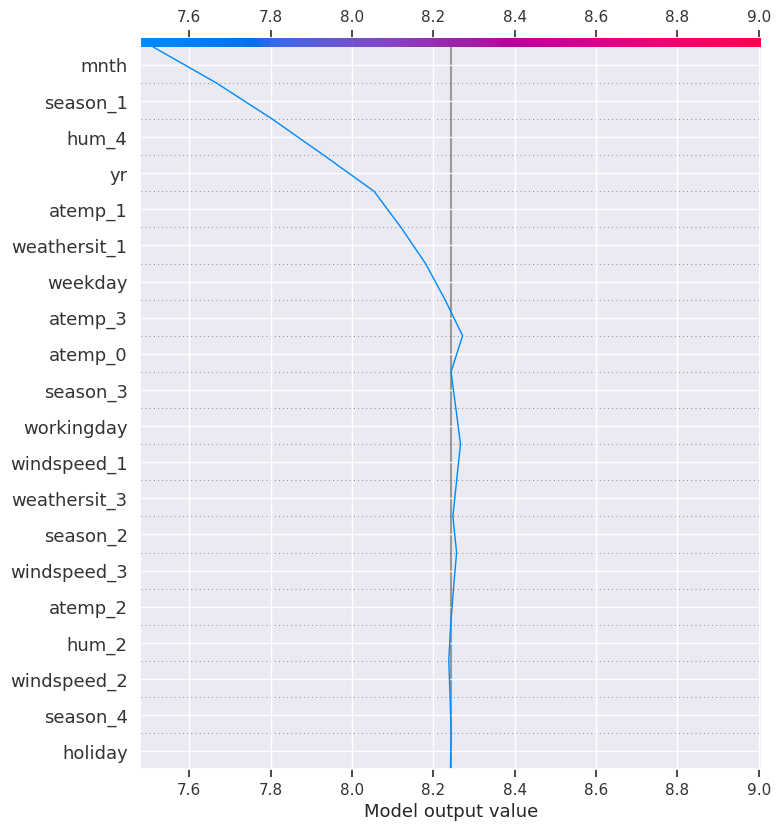

In [54]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], 
                  feature_names = list(df_transform[feature_cols].columns))

### Feature importance - Mean of Shapley Values

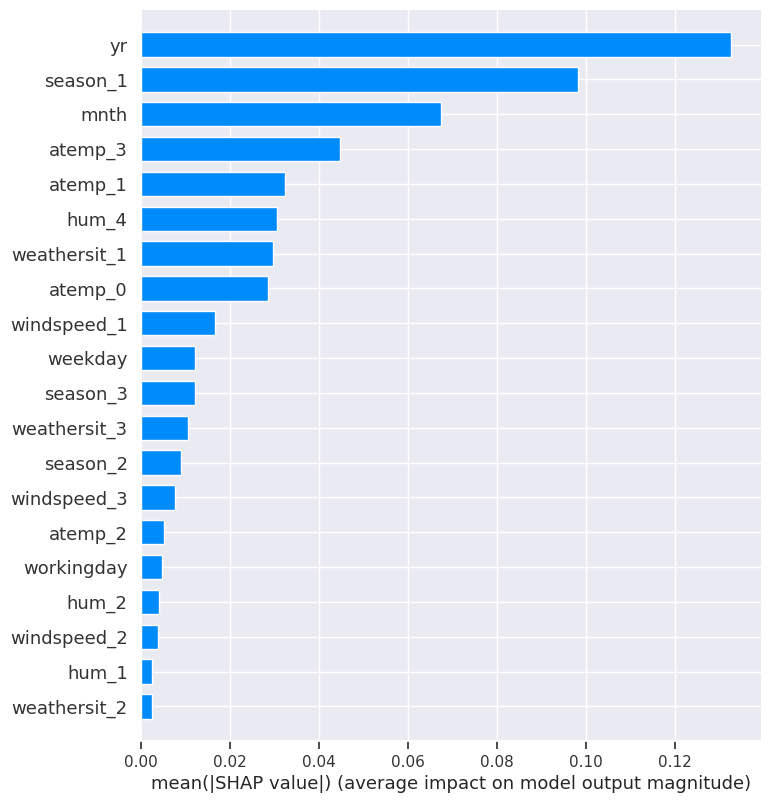

In [55]:
shap.summary_plot(shap_values, df_transform[feature_cols], 
                  feature_names=df_transform[feature_cols].columns, 
                  plot_type="bar")

#### Explainability of single prediction

The plot below explains the contribution of different features towards the prediction of the chosen sample - Here sample 5 (5th row) from the test data.
* Actual bike count from the given dataset = 8.51
* Predicted bike count by the random forest regressor = 7.95
* Base value i.e the prediction without using a model = 8.286

In [56]:
i = 5
shap.initjs()
print(f'Actual bike count of the chosen test date sample with log transform \
    {np.log1p(df_test_transform[target_cols].iloc[i])}')
shap.force_plot(explainer.expected_value, shap_values[i], 
                df_test_transform[feature_cols].iloc[i], 
                feature_names = list(df_test_transform[feature_cols].columns))

Actual bike count of the chosen test date sample with log transform     cnt    8.518992
Name: 2012-12-07, dtype: float64


## Part 4 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

* The task is well structured and validates the basic skills needed for a data scientist. It covers all the aspects of the responsibilites that a selected candidate would perform on a daily basis at SIXT. 
  
* I liked the fact that the task demands resoning of adoption of certain concepts and reporting of the results. This indicates that a role of data scientist will not be limited to program and build models. But also to communicate the results and educate the stakeholders about the progress of the project.
  
* I also appreciate the way the task was detailed to the extent explaining the model to use and instructions for the analysis to be performed. This helps the candidate to distribute the efforts to other areas and showcase the knowledge he/she posses which might be useful for other projects in the organization.
  
* It would have been more motivational and enthusiastic if the task was asked to be performed on the real dataset from SIXT.
  

## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.